# **Logistic Regression**

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

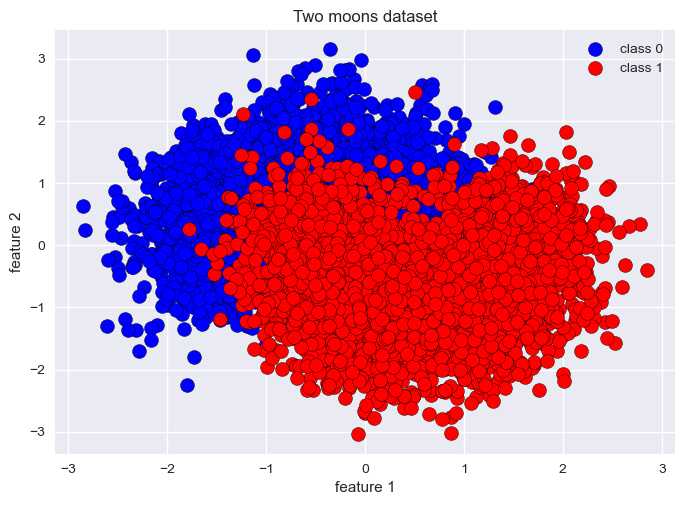

In [22]:
x, y = make_moons(n_samples=10000, noise=0.4)
x_train, x_test, y_train, y_test = train_test_split(
                                   x, y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

plt.style.use('seaborn')
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1],
             c='b', marker='o', s=100, edgecolors='black')
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1],
             c='r', marker='o', s=100, edgecolors='black')

plt.title('Two moons dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['class 0', 'class 1'])
plt.show()

**Accuracy on test data and cross validation accuracy**

In [23]:
LRclassifier = LogisticRegression(random_state=0)
LRclassifier.fit(x_train, y_train)
acc = LRclassifier.score(x_test, y_test)
print('The accuracy on test data is', acc)

print()

scores = cross_val_score(
    LRclassifier, x_train, y_train, cv=5, scoring='accuracy')
scores = scores.mean()

print('The cross validation accuracy is', scores)

The accuracy on test data is 0.841

The cross validation accuracy is 0.82725


**Decision Boundary**

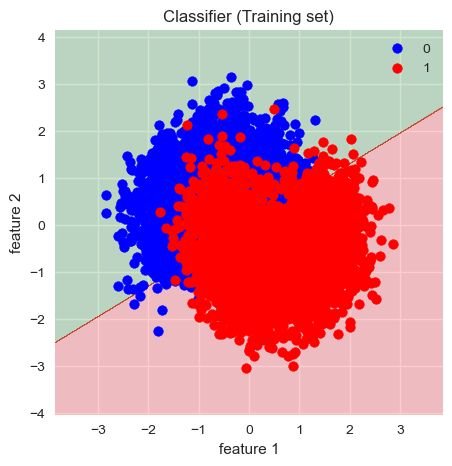

In [24]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                                stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (5,5))
plt.contourf(X1, X2, LRclassifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(
    X1.shape), alpha = 0.2, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for j in np.unique(y_set):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['blue', 'red'][j], label = j)
plt.title('Classifier (Training set)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

**ROC Curve**

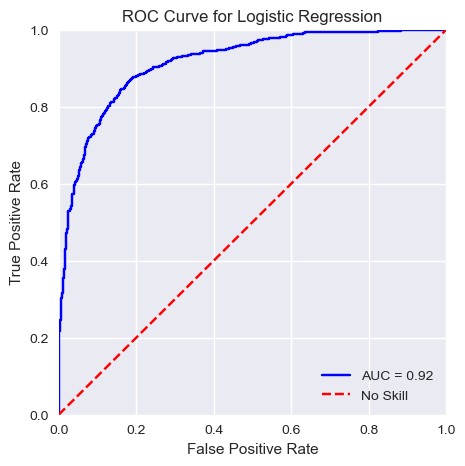

In [25]:
y_score = LRclassifier.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()